In [ ]:
# Install matplotlib
!pip install matplotlib


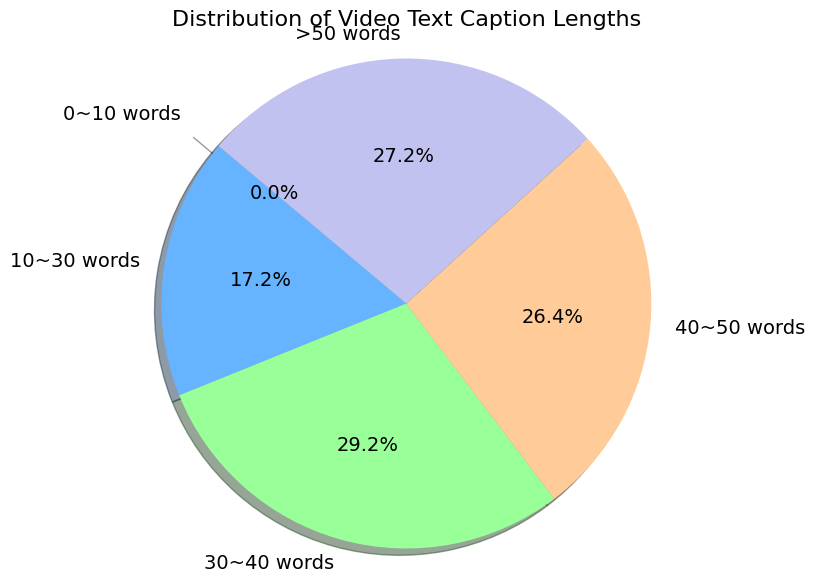

In [ ]:
# Install matplotlib
!pip install matplotlib

import json
import matplotlib.pyplot as plt

# Load the JSON file
with open('gemini_summaries_finalized.json', 'r') as file:
    data = json.load(file)

# Initialize counters for different length ranges
range_0_10 = 0
range_10_20 = 0
range_20_30 = 0
range_30_40 = 0
range_above_40 = 0

# Iterate over each video caption
for video_id, caption in data.items():
    # Calculate the length of the caption
    caption_length = len(caption.split())

    # Increment corresponding range counter
    if caption_length <= 10:
        range_0_10 += 1
    elif 10 < caption_length <= 30:
        range_10_20 += 1
    elif 20 < caption_length <= 40:
        range_20_30 += 1
    elif 30 < caption_length <= 50:
        range_30_40 += 1
    else:
        range_above_40 += 1

# Calculate total number of videos
total_videos = len(data)

# Calculate percentages for each range
percentage_0_10 = (range_0_10 / total_videos) * 100
percentage_10_20 = (range_10_20 / total_videos) * 100
percentage_20_30 = (range_20_30 / total_videos) * 100
percentage_30_40 = (range_30_40 / total_videos) * 100
percentage_above_40 = (range_above_40 / total_videos) * 100

# Pie chart
labels = ['0~10 words', '10~30 words', '30~40 words', '40~50 words', '>50 words']
sizes = [percentage_0_10, percentage_10_20, percentage_20_30, percentage_30_40, percentage_above_40]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice

plt.figure(figsize=(10, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 14})
plt.axis('equal')
plt.title('Distribution of Video Text Caption Lengths', fontsize=16)
plt.show()


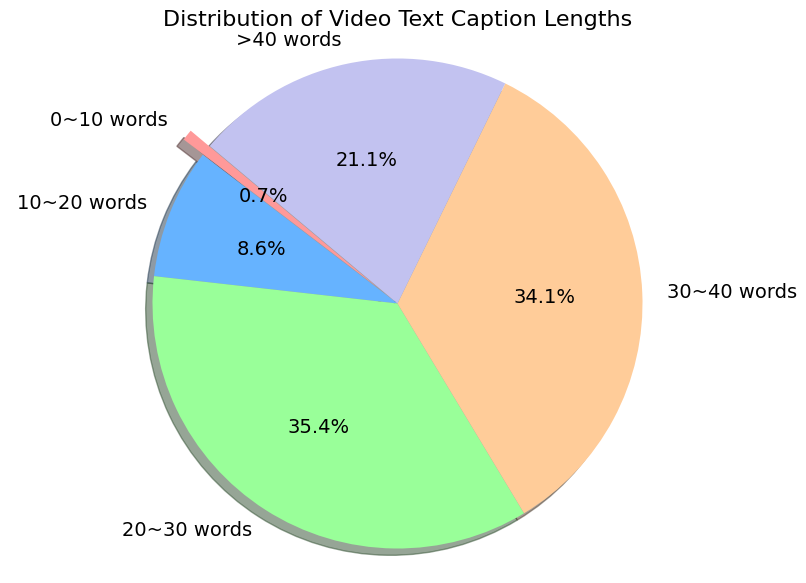

In [ ]:
# Install matplotlib
!pip install matplotlib

import json
import matplotlib.pyplot as plt

# Load the JSON file
with open('/content/gemini_summary_new.json', 'r') as file:
    data = json.load(file)

# Initialize counters for different length ranges
range_0_10 = 0
range_10_20 = 0
range_20_30 = 0
range_30_40 = 0
range_above_40 = 0

# Iterate over each video caption
for video_id, caption in data.items():
    # Calculate the length of the caption
    caption_length = len(caption.split())

    # Increment corresponding range counter
    if caption_length <= 10:
        range_0_10 += 1
    elif 10 < caption_length <= 20:
        range_10_20 += 1
    elif 20 < caption_length <= 30:
        range_20_30 += 1
    elif 30 < caption_length <= 40:
        range_30_40 += 1
    else:
        range_above_40 += 1

# Calculate total number of videos
total_videos = len(data)

# Calculate percentages for each range
percentage_0_10 = (range_0_10 / total_videos) * 100
percentage_10_20 = (range_10_20 / total_videos) * 100
percentage_20_30 = (range_20_30 / total_videos) * 100
percentage_30_40 = (range_30_40 / total_videos) * 100
percentage_above_40 = (range_above_40 / total_videos) * 100

# Pie chart
labels = ['0~10 words', '10~20 words', '20~30 words', '30~40 words', '>40 words']
sizes = [percentage_0_10, percentage_10_20, percentage_20_30, percentage_30_40, percentage_above_40]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice

plt.figure(figsize=(10, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 14})
plt.axis('equal')
plt.title('Distribution of Video Text Caption Lengths', fontsize=16)
plt.show()


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

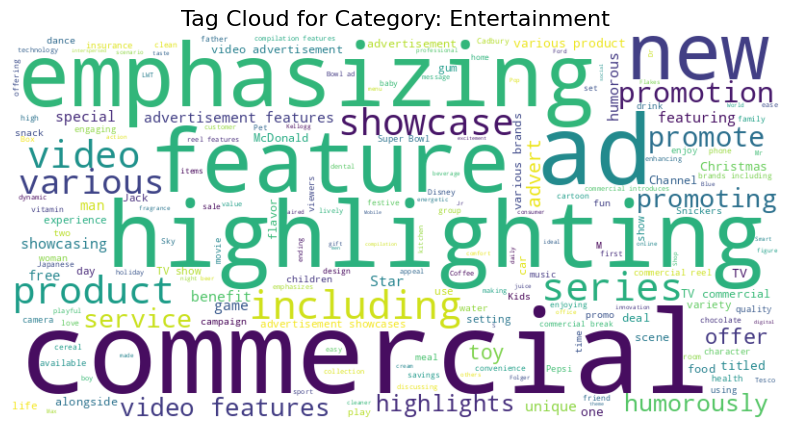

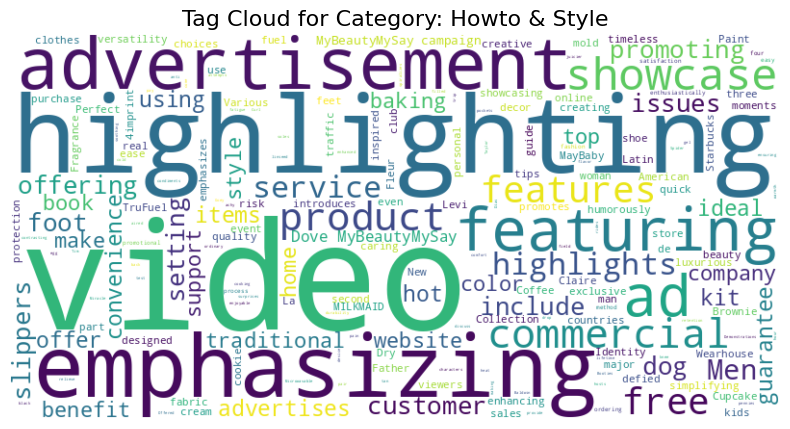

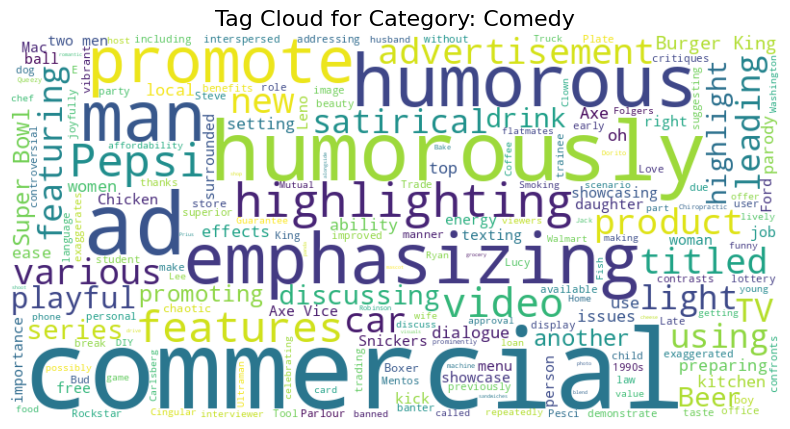

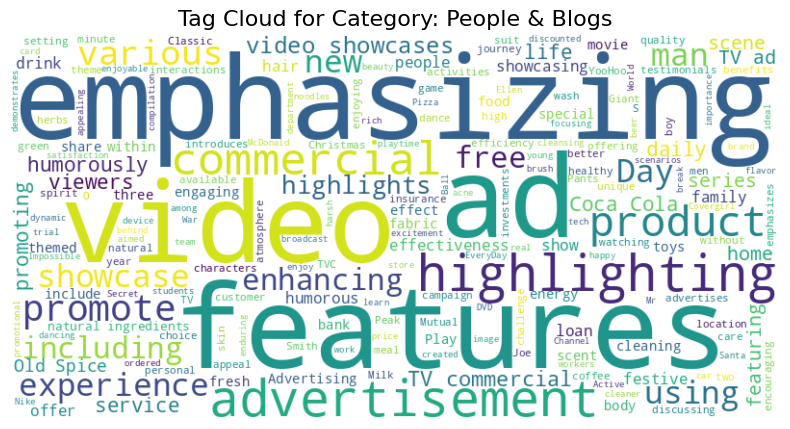

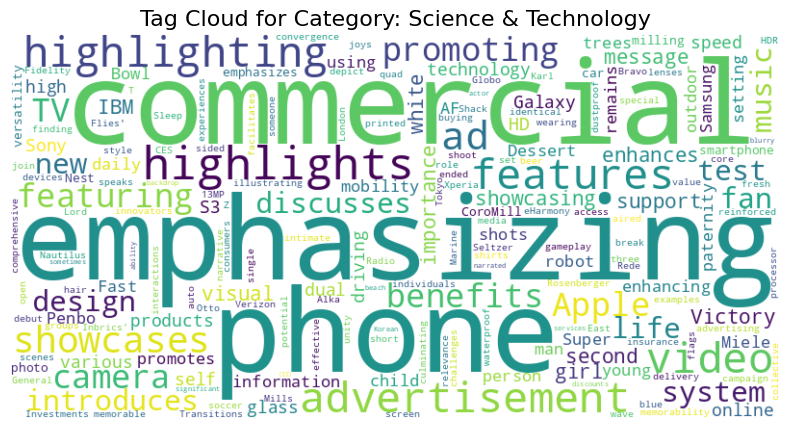

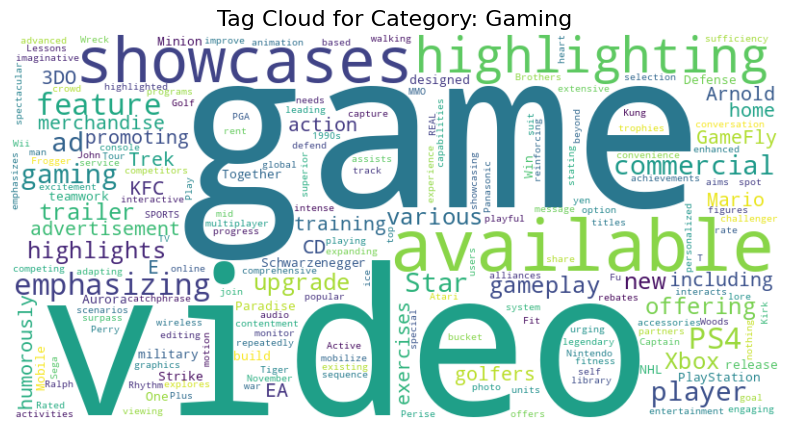

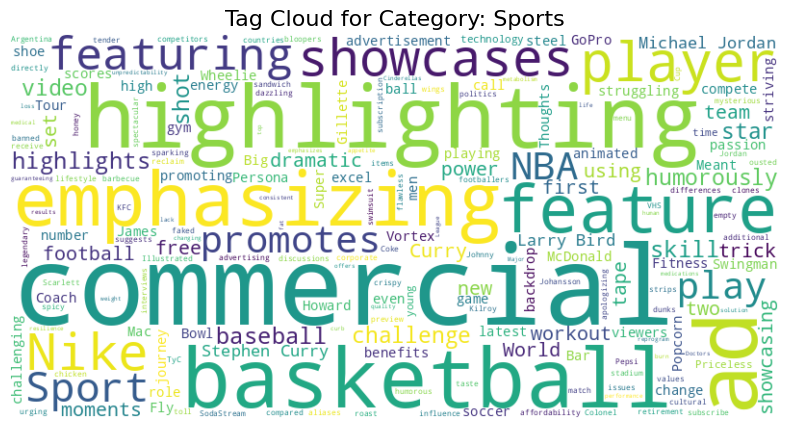

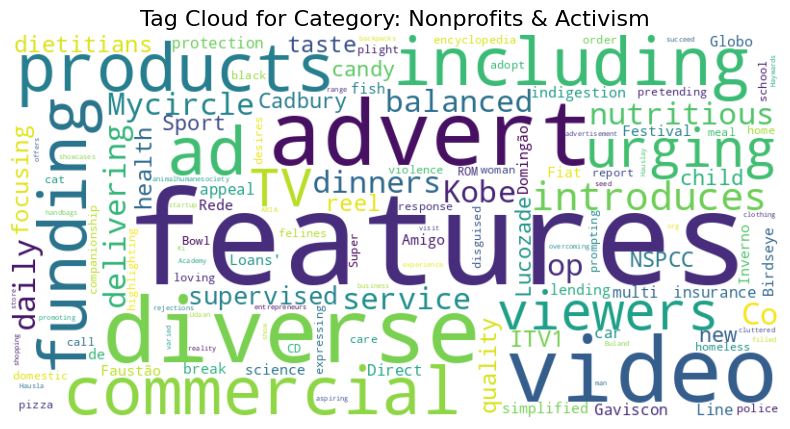

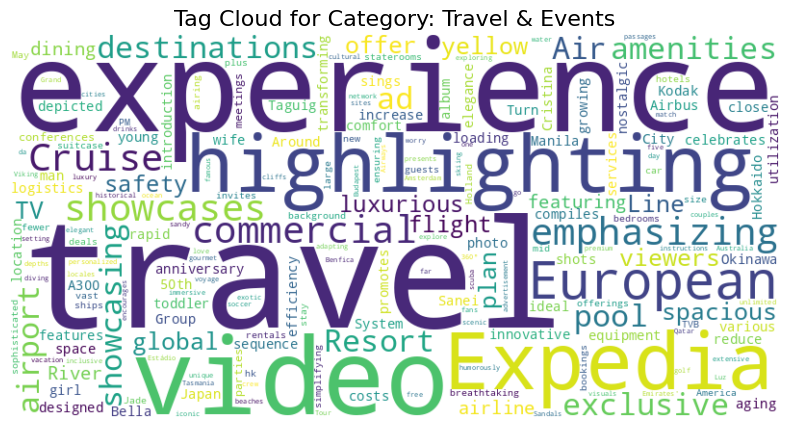

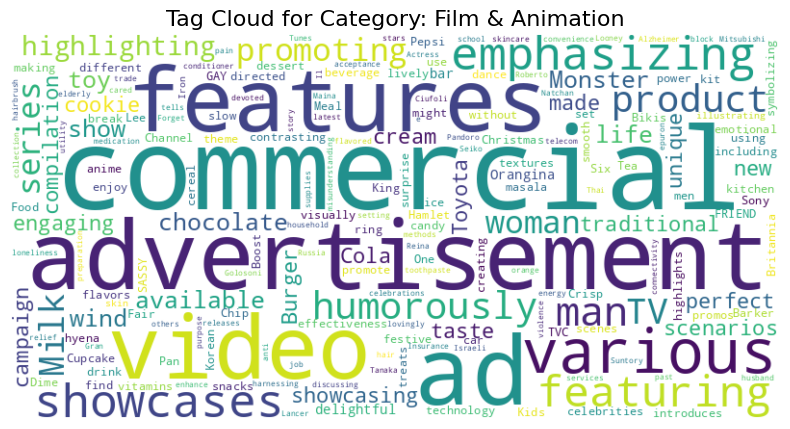

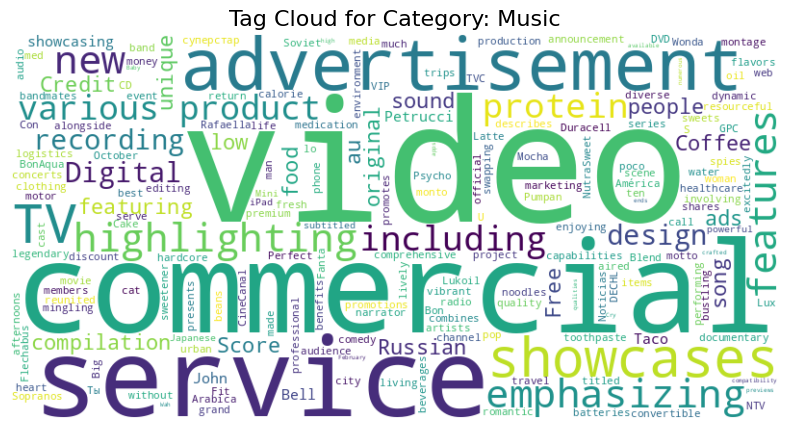

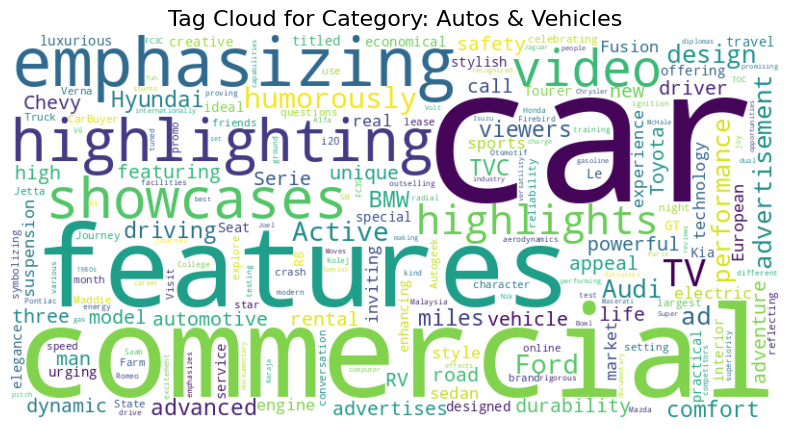

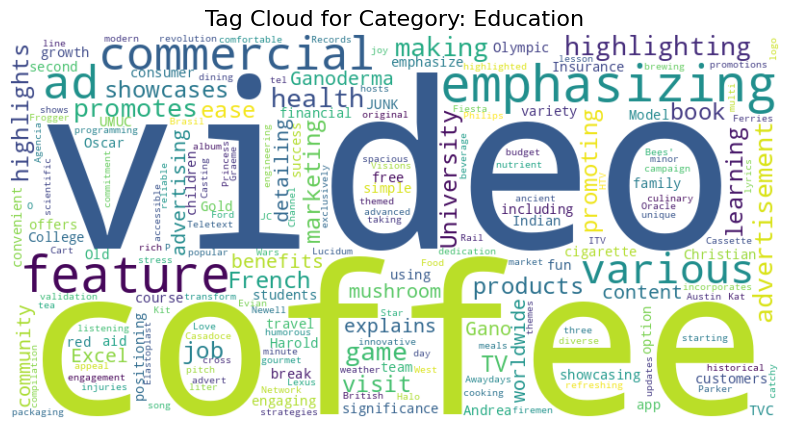

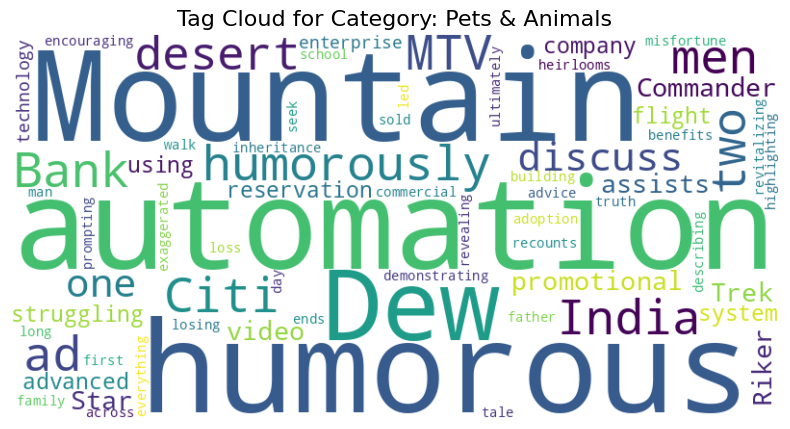

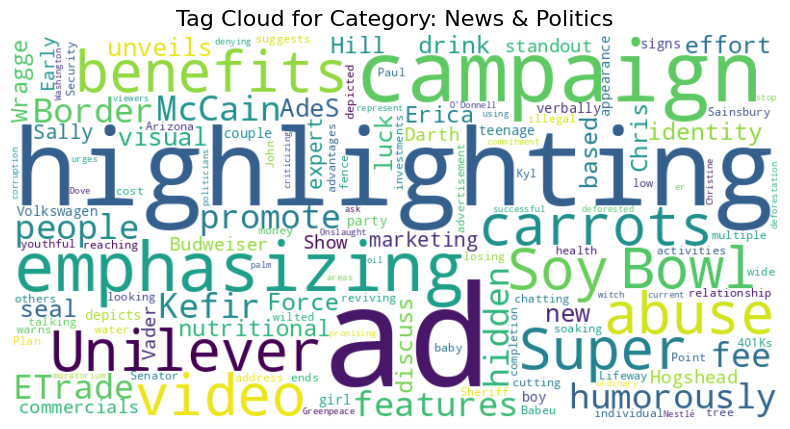

In [ ]:
# Install necessary libraries
!pip install wordcloud matplotlib

import os
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the JSON file containing captions
with open('/content/gpt_summaries_final.json', 'r') as file:
    captions_data = json.load(file)

# Directory containing the dataset folders
dataset_dir = '/content/drive/MyDrive/dataset_all1'

# Initialize a dictionary to hold categories and their corresponding captions
category_captions = {}

# Iterate through the main dataset folders
for folder_name in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder_name)

    if os.path.isdir(folder_path):
        # Iterate through the subfolders corresponding to video IDs
        for video_id_folder in os.listdir(folder_path):
            video_id_folder_path = os.path.join(folder_path, video_id_folder)

            if os.path.isdir(video_id_folder_path):
                # Read the JSON file inside the subfolder
                json_file_path = os.path.join(video_id_folder_path, f"{video_id_folder}.json")

                if os.path.isfile(json_file_path):
                    with open(json_file_path, 'r') as json_file:
                        video_data = json.load(json_file)

                        # Extract category and caption
                        category = video_data['yt_meta_dict']['info']['categories'][0]  # Assuming there's at least one category
                        caption = captions_data.get(video_id_folder, "")

                        if category and caption:
                            if category not in category_captions:
                                category_captions[category] = []
                            category_captions[category].append(caption)

# Generate tag clouds for each category
for category, captions in category_captions.items():
    combined_captions = ' '.join(captions)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_captions)

    # Plot the tag cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Tag Cloud for Category: {category}', fontsize=16)
    plt.show()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 37.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


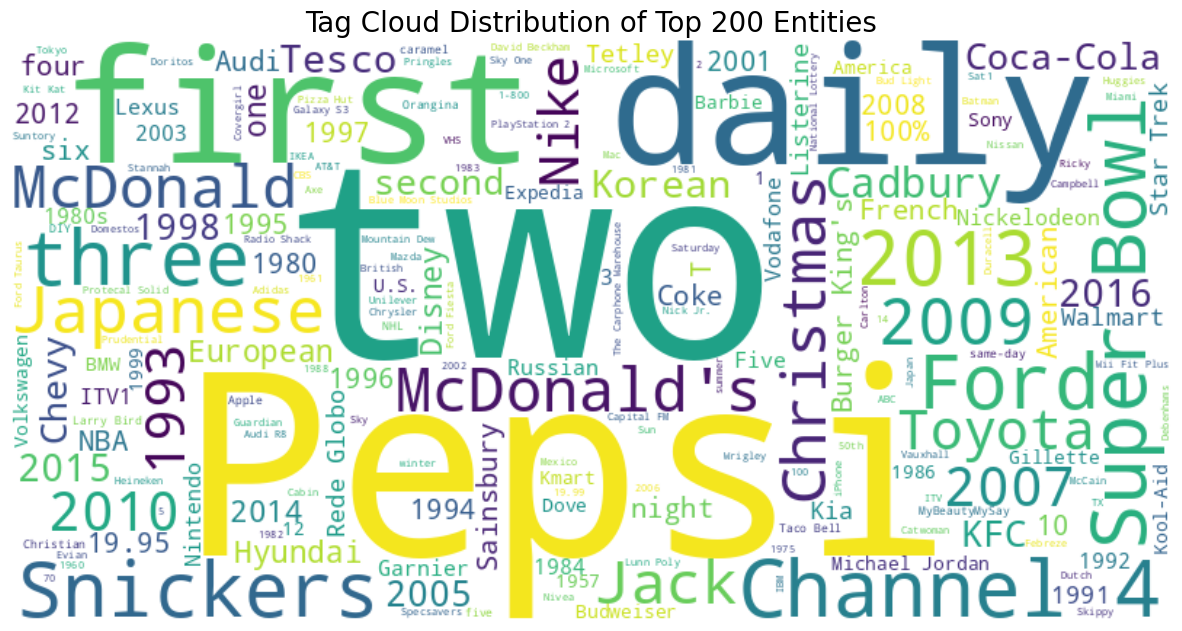

In [ ]:
# Install necessary libraries
!pip install spacy wordcloud matplotlib
!python -m spacy download en_core_web_sm

import os
import json
import spacy
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# Load the SpaCy model
nlp = spacy.load("en_core_web_sm")

# Load the JSON file containing captions
with open('/content/gpt_summaries_final.json', 'r') as file:
    captions_data = json.load(file)

# Directory containing the dataset folders
dataset_dir = '/content/drive/MyDrive/dataset_all1'

# Initialize a list to hold all captions
all_captions = []

# Iterate through the main dataset folders
for folder_name in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder_name)

    if os.path.isdir(folder_path):
        # Iterate through the subfolders corresponding to video IDs
        for video_id_folder in os.listdir(folder_path):
            video_id_folder_path = os.path.join(folder_path, video_id_folder)

            if os.path.isdir(video_id_folder_path):
                # Read the JSON file inside the subfolder
                json_file_path = os.path.join(video_id_folder_path, f"{video_id_folder}.json")

                if os.path.isfile(json_file_path):
                    with open(json_file_path, 'r') as json_file:
                        video_data = json.load(json_file)

                        # Extract the caption
                        caption = captions_data.get(video_id_folder, "")

                        if caption:
                            all_captions.append(caption)

# Function to extract entities from text
def extract_entities(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents]

# Extract entities from all captions
all_entities = []
for caption in all_captions:
    entities = extract_entities(caption)
    all_entities.extend(entities)

# Count the frequency of each entity
entity_counts = Counter(all_entities)

# Get the top 200 entities
top_entities = entity_counts.most_common(200)

# Prepare data for the word cloud
wordcloud_data = dict(top_entities)

# Generate and plot the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Tag Cloud Distribution of Top 200 Entities', fontsize=20)
plt.show()


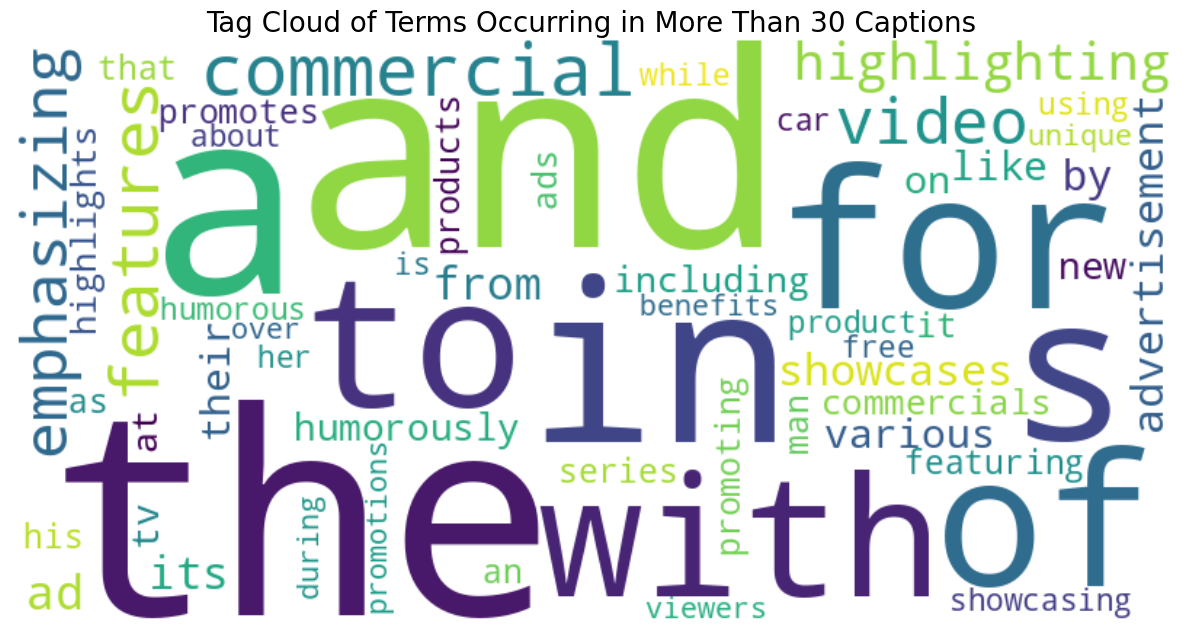

In [ ]:
# Install necessary libraries
!pip install wordcloud matplotlib

import json
import os
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import re

# Load the JSON file containing captions
with open('/content/gpt_summaries_final.json', 'r') as file:
    captions_data = json.load(file)

# Function to clean and tokenize text
def clean_and_tokenize(text):
    # Remove special characters and tokenize
    text = re.sub(r'\W+', ' ', text)
    tokens = text.lower().split()
    return tokens

# Initialize a Counter to hold term frequencies across captions
term_frequency = Counter()

# Iterate through all captions
for caption in captions_data.values():
    tokens = clean_and_tokenize(caption)
    unique_tokens = set(tokens)
    term_frequency.update(unique_tokens)

# Filter terms that occur in more than 100 captions
filtered_terms = {term: count for term, count in term_frequency.items() if count > 30}

# Generate and plot the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(filtered_terms)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Tag Cloud of Terms Occurring in More Than 30 Captions', fontsize=20)
plt.show()
